<a href="https://colab.research.google.com/github/NophaieViscente/AnaliseTurnover/blob/main/An%C3%A1lise_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as Bibliotecas. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Lendo o arquivo csv extraído.
df = pd.read_csv('/content/drive/MyDrive/funcionarios.csv', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Retirando dados inconsistentes, que não contém a Data de Admissão.
df = df.loc[df.DataAdmissao != '-']

In [4]:
# Separando a Coluna 'ChaveLink' que contém as movimentações dos funcionários
df[['Empresa','ID_Funcionario']] = df.ChaveFuncionario.str.split('|',expand=True)
# Deletando a Coluna Chave Funcionário pois a mesma já foi separada junto com a coluna 'ChaveLink
del df['ChaveFuncionario']

In [5]:
# Adicionando a Coluna Situação para cada funcionário
df['Situacao'] = 'NaN'

In [6]:
# Colocando a situação dos funcionários no DataSet.
df.loc[(df.DataDesligamento == '-'), 'Situacao'] = 'Ativo'
df.loc[(df.DataDesligamento != '-'), 'Situacao'] = 'Desligado'

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485460 entries, 31 to 549608
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Ano                        485460 non-null  object        
 1   Mes                        485460 non-null  object        
 2   DataAdmissao               485460 non-null  datetime64[ns]
 3   DataDesligamento           485460 non-null  object        
 4   CargoFuncionario           485460 non-null  object        
 5   ValorSalario               485460 non-null  float64       
 6   FaixaSalarial              485460 non-null  object        
 7   SexoFuncionario            485460 non-null  object        
 8   DataNascimentoFuncionario  485460 non-null  datetime64[ns]
 9   EstadoCivilFuncionario     485460 non-null  object        
 10  GrauInstrucao              485460 non-null  object        
 11  CidadeFuncionario          485460 non-null  object 

In [8]:
df.DataAdmissao = pd.to_datetime(df.DataAdmissao)
df.DataNascimentoFuncionario = pd.to_datetime(df.DataNascimentoFuncionario)

In [9]:
df.columns

Index(['Ano', 'Mes', 'DataAdmissao', 'DataDesligamento', 'CargoFuncionario',
       'ValorSalario', 'FaixaSalarial', 'SexoFuncionario',
       'DataNascimentoFuncionario', 'EstadoCivilFuncionario', 'GrauInstrucao',
       'CidadeFuncionario', 'BairroFuncionario', 'IniciativaRescisao',
       'JustaCausaRescisao', 'FuncionarioSindicalizado', 'RecebeInsalubridade',
       'RecebePericulosidade', 'CargaHorariaFuncionario', 'SituacaoFerias',
       'CodigoDependente', 'GrauDependente', 'Empresa', 'ID_Funcionario',
       'Situacao'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517424 entries, 31 to 549632
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Ano                        517424 non-null  object        
 1   Mes                        517424 non-null  object        
 2   DataAdmissao               517424 non-null  datetime64[ns]
 3   DataDesligamento           517424 non-null  object        
 4   CargoFuncionario           517424 non-null  object        
 5   ValorSalario               517424 non-null  object        
 6   FaixaSalarial              517424 non-null  object        
 7   SexoFuncionario            517424 non-null  object        
 8   DataNascimentoFuncionario  517424 non-null  datetime64[ns]
 9   EstadoCivilFuncionario     517424 non-null  object        
 10  GrauInstrucao              517424 non-null  object        
 11  CidadeFuncionario          517424 non-null  object 

In [11]:
df['Cidade_Empresa'] = 'NaN'
df.loc[(df.Empresa == '101'), 'Cidade_Empresa'] = 'Palmas-PR'
df.loc[(df.Empresa == '701'), 'Cidade_Empresa'] = 'Cacador-SC'
df.loc[(df.Empresa == '103'), 'Cidade_Empresa'] = 'Santa_Cecilia-SC'
df.loc[(df.Empresa == '703'), 'Cidade_Empresa'] = 'Palmas-PR'

In [12]:
data = df[['Empresa', 'Cidade_Empresa','Ano', 'Mes','CargoFuncionario',
       'ValorSalario', 'SexoFuncionario',
       'EstadoCivilFuncionario', 'GrauInstrucao',
       'IniciativaRescisao','JustaCausaRescisao', 'FuncionarioSindicalizado', 'RecebeInsalubridade',
       'RecebePericulosidade', 'CargaHorariaFuncionario', 'SituacaoFerias', 'Situacao']]

In [14]:
# Colocando números nas categorias das 'colunasTransformar' .
for nome_coluna in data.columns :
  if (data[nome_coluna].dtype == 'object'):
    data[nome_coluna]= data[nome_coluna].astype('category')
    data[nome_coluna] = data[nome_coluna].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
data.isnull().sum()

Empresa                     0
Cidade_Empresa              0
Ano                         0
Mes                         0
CargoFuncionario            0
ValorSalario                0
SexoFuncionario             0
EstadoCivilFuncionario      0
GrauInstrucao               0
IniciativaRescisao          0
JustaCausaRescisao          0
FuncionarioSindicalizado    0
RecebeInsalubridade         0
RecebePericulosidade        0
CargaHorariaFuncionario     0
SituacaoFerias              0
Situacao                    0
dtype: int64

Text(0.5, 1.0, 'Quantidade de dados funcionários desligados(1) e Ativos(0)')

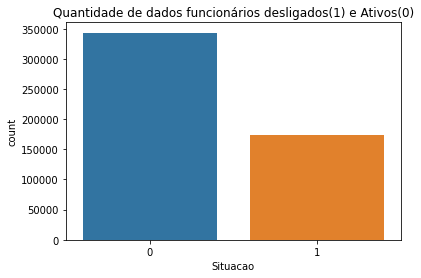

In [16]:
sns.countplot(x='Situacao',data=data)
plt.title('Quantidade de dados funcionários desligados(1) e Ativos(0)')

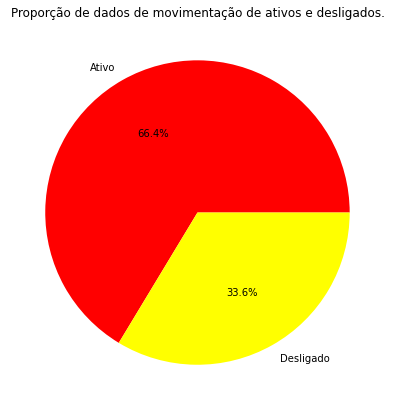

In [17]:
# Plotando a proporção de dados na empresa.
rotulos = df['Situacao'].value_counts().index
cores = ['red','yellow']
valores = df['Situacao'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(valores,labels=rotulos,colors=cores,autopct='%1.1f%%')
plt.title('Proporção de dados de movimentação de ativos e desligados.')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


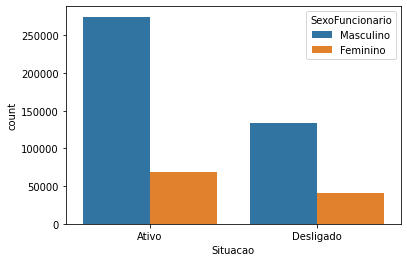

In [18]:
# Verificando a situação por gênero.
sns.countplot(df['Situacao'], hue=df['SexoFuncionario'])
plt.show()

In [19]:
df.CargoFuncionario = df.CargoFuncionario.str.upper()

In [21]:
# capturando o indice das linhas que não tem o valor de salário.
listaRemover = []
for i in df.ValorSalario.items() :
  if i[1] == '-' :
    listaRemover.append(i[0])
# Removendo as linhas capturadas do dataset.
df = df.drop(listaRemover)

In [22]:
df.ValorSalario = df.ValorSalario.astype('float64')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

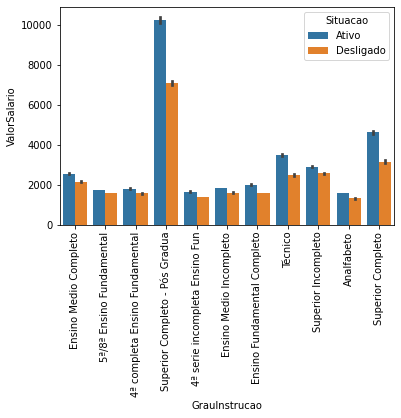

In [23]:
sns.barplot(x='GrauInstrucao',y='ValorSalario',hue='Situacao',data=df)
plt.xticks(rotation=90)

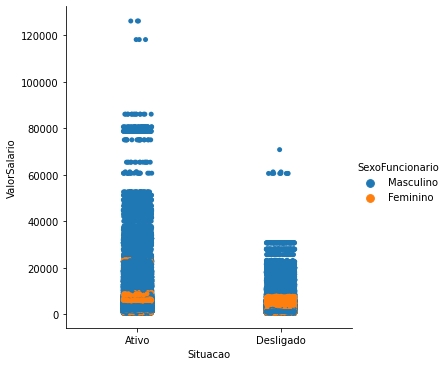

In [24]:
sns.catplot(x='Situacao',y='ValorSalario',hue='SexoFuncionario',data=df)
plt.show()

In [25]:
data = data.drop('CargoFuncionario',axis=1)

In [26]:
data.columns

Index(['Empresa', 'Cidade_Empresa', 'Ano', 'Mes', 'ValorSalario',
       'SexoFuncionario', 'EstadoCivilFuncionario', 'GrauInstrucao',
       'IniciativaRescisao', 'JustaCausaRescisao', 'FuncionarioSindicalizado',
       'RecebeInsalubridade', 'RecebePericulosidade',
       'CargaHorariaFuncionario', 'SituacaoFerias', 'Situacao'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split
X = data.drop(['Situacao','IniciativaRescisao','JustaCausaRescisao'],axis=1).values
y = data.Situacao.values

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
SEED = 42
np.random.seed(SEED)
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.33, random_state=SEED)

In [29]:
# Usando KFold para a mistura dos dados de treino . 
cv = KFold(n_splits=5,shuffle=True)

In [47]:
# Passando e treinando os modelos de Machine Learning . 
modelo_svc = SVC()
modeloFlorestaAleatoria = RandomForestClassifier(n_estimators=9)
modeloArvoreDecisao = DecisionTreeClassifier(max_depth=20)
modeloRegressaoLogistica = LogisticRegression(solver='liblinear',max_iter=25)
modelos = [modeloRegressaoLogistica, modeloFlorestaAleatoria, modeloArvoreDecisao]
nome = ['Regressão Logística', 
         'Floresta Aleatória','Arvore Decisão']
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
cont = 0
for item in modelos:
    
    resultados = cross_val_score(item, X_treino, y_treino, cv = cv, 
                              scoring = 'accuracy')
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Acurácia média - Modelo {}: {:.2f}%'
          .format(nome[cont], media*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(nome[cont], 
                  (media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
    cont += 1

Acurácia média - Modelo Regressão Logística: 66.40%
Intervalo de acurácia - Modelo Regressão Logística: [66.16% ~ 66.65%]

Acurácia média - Modelo Floresta Aleatória: 86.40%
Intervalo de acurácia - Modelo Floresta Aleatória: [86.26% ~ 86.54%]

Acurácia média - Modelo Arvore Decisão: 87.80%
Intervalo de acurácia - Modelo Arvore Decisão: [87.43% ~ 88.17%]



In [67]:
# Criando função para determinar a precisão do modelo.
def intervalo_precisao(resultados):
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Precisão média: {:.2f}%'.format(media*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
modeloFlorestaAleatoria = RandomForestClassifier(n_estimators=5)
resultados = cross_val_score(modeloFlorestaAleatoria, X_treino, y_treino, cv = cv, 
                          scoring='precision_weighted')
intervalo_precisao(resultados)

Precisão média: 85.79%
Intervalo de Precisão: [85.52% ~ 86.06%]


In [69]:
def intervalo_recall(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = RandomForestClassifier(n_estimators=5)
results = cross_val_score(model, X_treino, y_treino, cv = cv, scoring = 'recall')
intervalo_recall(results)

Recall médio: 76.52%
Intervalo de Recall: [75.78% ~ 77.25%]


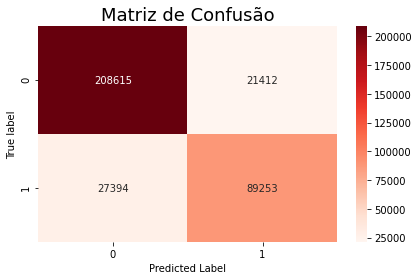

In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = RandomForestClassifier(n_estimators=5)
y_pred = cross_val_predict(model, X_treino, y_treino, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_treino, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [65]:
modeloFlorestaAleatoria_final = RandomForestClassifier(n_estimators=3)
modeloFlorestaAleatoria_final.fit(X_treino, y_treino)
y_pred = modeloFlorestaAleatoria_final.predict(X_teste)
# imprimindo relatório de classificação
print("Relatório de Classificação:\n", 
       classification_report(y_teste, y_pred, digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89    113312
           1       0.81      0.76      0.78     57438

    accuracy                           0.86    170750
   macro avg       0.84      0.84      0.84    170750
weighted avg       0.86      0.86      0.86    170750

